# Exploratory data analysis

Import necessary modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import os
import random
from matplotlib.colors import ListedColormap

First, read in all available MRIs as well as the corresponding annotations for each file.

In [3]:
# Read in data files
data_dir = '/Users/alexandrasmith/Desktop/Workspace/Projects/UNN_BraTS23/data/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/'
files = os.listdir(data_dir)

Now, lets visualise an example image from this dataset. 

Each volume contains the modalities T1, T1Gd, T2 and FLAIR.

Files format: classes in file paths are:
- t1c = T1 post contrast?
- t1n = T1?
- t2f = FLAIR
- t2w = T2-weighted

Each modality has dimensions (240, 240, 155).

The segementation volume contains values [0, 1, 2, 3].

**TODO:** Check what 0, 1, 2, 3 correspond to -- make sure of labels for plotting and labelling the subregions

Working with file: BraTS-SSA-00008-000


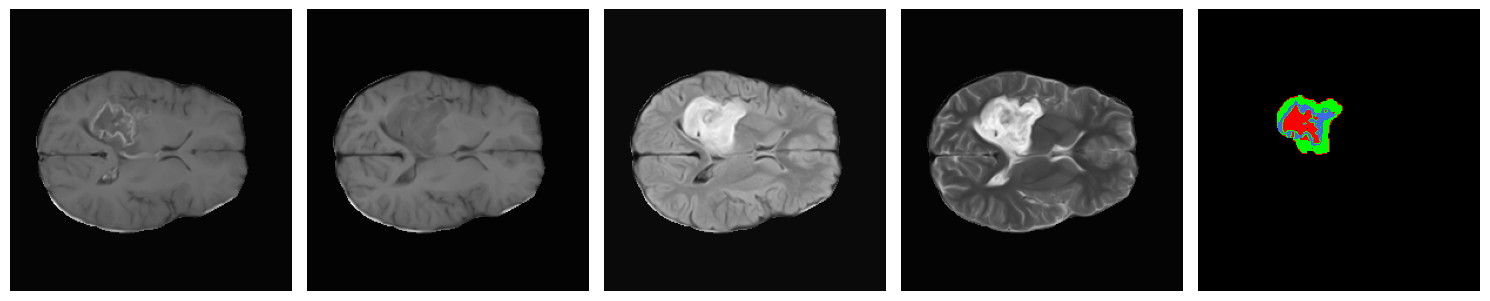

In [33]:
# Select one image to visualise
img_folder = files[random.randrange(0, len(files))]
print(f"Working with file: {img_folder}")

# Load image volumes
img_volumes = [nib.load(os.path.join(data_dir + img_folder, img_folder + f"-{m}.nii.gz")) for m in ["t1c", "t1n", "t2f", "t2w"]]
# Load segmentation volume
seg_volume = nib.load(os.path.join(data_dir + img_folder, img_folder + "-seg.nii.gz"))

# Extract slice for visualisation purposes
# Extract 75th slice
imgs = [img_volumes[i].get_fdata().astype(np.float32)[:, :, 75] for i in range(len(img_volumes))]
lbl = seg_volume.get_fdata().astype(np.float32)[:, :, 75]

# Create colour map to plot
colours = ['black', 'red', 'lime', 'royalblue']
cmap = ListedColormap(colours)

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
for i, img in enumerate(imgs):
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')
ax[-1].imshow(lbl, vmin=0, vmax=4, cmap=cmap)
ax[-1].axis('off')
plt.tight_layout()            
plt.show()

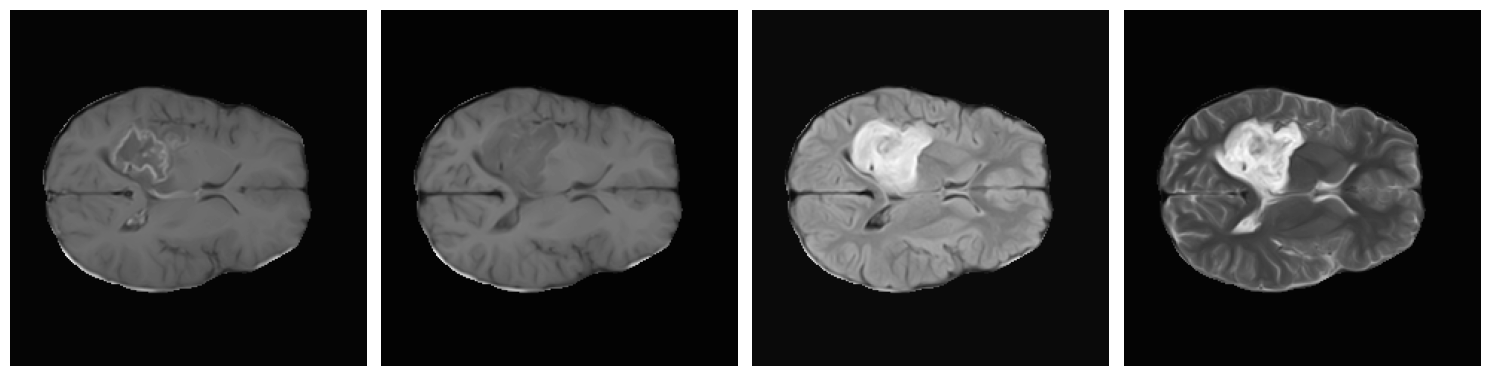

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 15))
labels = ["t1c", "t1n", "t2f", "t2w"]
for i, img in enumerate(imgs):
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')
    plt.imshow(img, cmap="gray")
    plt.savefig('/Users/alexandrasmith/Desktop/Workspace/Projects/UNN_BraTS23/reports/' + img_folder + '_' + labels[i]  + '.png')
    # ax[i].set_title(labels[i])
plt.tight_layout()            
plt.show()

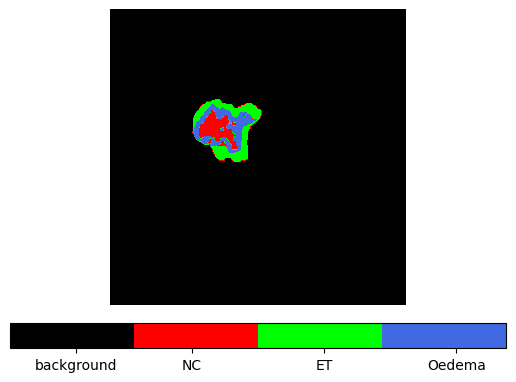

In [57]:
# Save segmentation mask
cax = plt.imshow(lbl, cmap=cmap)
plt.axis('off')
# plt.colorbar()
cbar = fig.colorbar(cax, ticks=[0.4, 1.1, 1.9, 2.7], orientation='horizontal', pad=0.05)
# plt.colorbar(ticks=['background', 'NC', 'ET', 'Oedema'])
cbar.ax.set_xticklabels(['background', 'NC', 'ET', 'Oedema'])
plt.savefig('/Users/alexandrasmith/Desktop/Workspace/Projects/UNN_BraTS23/reports/' + img_folder + '_seg'  + '.png')

### Trying to create a visual

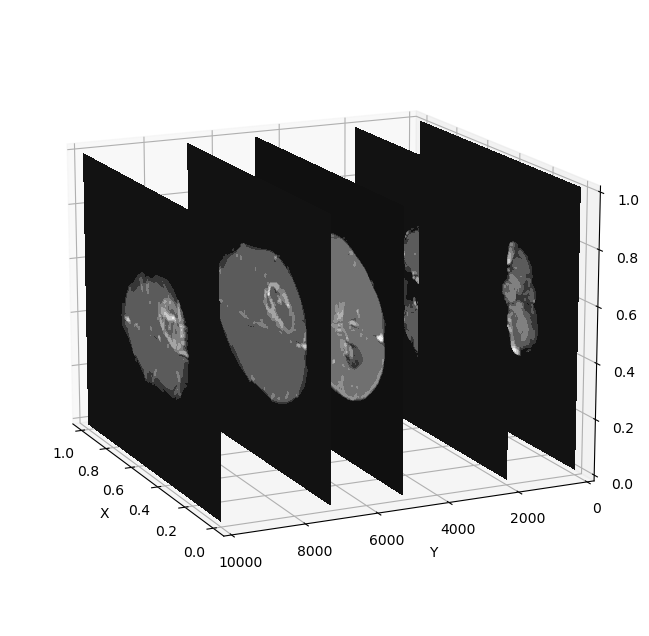

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# create a vertex mesh
X, Z = np.meshgrid(np.linspace(0,1,240), np.linspace(0,1,240))

# create the figure
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection ='3d')

data = imgs[0]
mod = img_volumes[0]

ax.contourf(X, mod.get_fdata().astype(np.float32)[:, :, 20], Z, zdir='y', offset=-0, cmap='gray')
ax.contourf(X, mod.get_fdata().astype(np.float32)[:, :, 50], Z, zdir='y', offset=2000.0, cmap='gray')
ax.contourf(X, mod.get_fdata().astype(np.float32)[:, :, 75], Z, zdir='y', offset=5000.0, cmap='gray')
ax.contourf(X, mod.get_fdata().astype(np.float32)[:, :, 110], Z, zdir='y', offset=7000.0, cmap='gray')
ax.contourf(X, mod.get_fdata().astype(np.float32)[:, :, 130], Z, zdir='y', offset=10000.0, cmap='gray')

ax.view_init(15,155)
ax.set_ylim((0., 10000))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# for axis in [ax1.xaxis, ax1.yaxis, ax1.zaxis]:
# # for axis in [ax1.yaxis]:
#     axis.set_ticklabels([])
#     axis._axinfo['axisline']['linewidth'] = 1
#     axis._axinfo['axisline']['color'] = (0, 0, 0)
#     axis._axinfo['grid']['linewidth'] = 0.5
#     axis._axinfo['grid']['linestyle'] = "-"
#     axis._axinfo['grid']['color'] = (0, 0, 0)
#     axis._axinfo['tick']['inward_factor'] = 0.0
#     axis._axinfo['tick']['outward_factor'] = 0.0
#     axis.set_pane_color((0.95, 0.95, 0.95))
plt.show()